In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cobra
from MatplotProp import CanvasStyle, PltProps
PltProps()

In [2]:
# all_slope = pd.read_csv('FlyDFA_slope.csv')
e_slope = pd.read_csv('[hypoxia]PLOS_Fly_early_slope.csv')
l_slope = pd.read_csv('[hypoxia]PLOS_Fly_late_slope.csv')
hp = np.zeros((len(e_slope), 2))
ylabel = []
xlabel = ['Early stage', 'Late stage']
for i in range(len(e_slope)):
#     print(i, str(e_slope.iloc[1]).split(';')[23])
    met = str(e_slope.iloc[i]).split(';')[21][9:]
    ylabel.append(met)
    hp[i, 0] = float(str(e_slope.iloc[i]).split(';')[22].split('...')[0])
    hp[i, 1] = float(str(l_slope.iloc[i]).split(';')[22].split('...')[0])
    if met == 'glycerol':
        print(hp[i, 0], hp[i, 1])
    
#     hp[i, 2] = float(str(e_slope.iloc[i]).split(';')[3].split('...')[0])
df = pd.DataFrame(hp)
df.columns = xlabel
df.index = ylabel

In [3]:
mets = []
e_v = []
l_v = []
row = 0
for arr1, arr2 in zip(l_slope.values, e_slope.values):
    mets.append(arr1[0].split(';')[0])
    if row==0:
        l_v = np.zeros((len(l_slope)-1, len(arr1[0].split(';')[1:])))
        e_v = np.zeros((len(l_slope)-1, len(arr1[0].split(';')[1:])))
    else:
        l_v[row-1, :] = arr1[0].split(';')[1:]
        e_v[row-1, :] = arr2[0].split(';')[1:]
    row += 1

In [253]:
comp = np.concatenate(([e_v[:, -1]], [l_v[:, -1]]), axis=0)
display(comp.shape)
df = pd.DataFrame(data=comp)
o2 = l_slope.iloc[0].values[0].split(';')[1:]
df.index = xlabel
df.columns = mets[1:]
print(df.columns)

(2, 33)

Index(['L-Alanine', 'L-Asparagine', 'L-Aspartate', 'Citrate ', 'L-Citrulline',
       'D-Fructose', 'Fumarate', 'D-Glucose', 'L-Glutamine', 'Glycine ',
       'L-Histidine', 'Hypoxanthine ', 'Inosine', 'myo-Inositol',
       'L-Isoleucine', 'L-Leucine', 'L-Lysine', 'L-Malate', 'Maltose ',
       'L-Methionine', 'Nicotinamide adenine dinucleotide', 'L-Ornithine',
       'L-phenylalanine', 'Phosphate', 'L-Proline', 'L-Serine',
       'succinic acid', 'L-Threonine', 'Trehalose', 'L-Tryptophane',
       'L-Tyrosine', 'Urea ', 'L-Valine'],
      dtype='object')


,L-Alanine,L-Asparagine,L-Aspartate,Citrate,L-Citrulline,D-Fructose,Fumarate,D-Glucose,L-Glutamine,Glycine,...,Phosphate,L-Proline,L-Serine,succinic acid,L-Threonine,Trehalose,L-Tryptophane,L-Tyrosine,Urea,L-Valine
Early stage,0.000275,0.004696,-0.007918,0.010866,0.009290,-0.004301,0.000985,0.006586,-0.005283,0.008014,...,0.002253,-0.000590,0.002643,0.010236,0.002595,-0.117385,0.012820,0.007206,-0.004473,0.006367
Late stage,-0.020518,-0.000865,-0.004391,0.000987,-0.028604,0.022972,0.000294,-0.019282,0.004896,-0.001308,...,0.001665,0.017894,0.018407,-0.023664,0.008690,-0.001720,-0.002196,-0.001646,-0.002979,0.000128


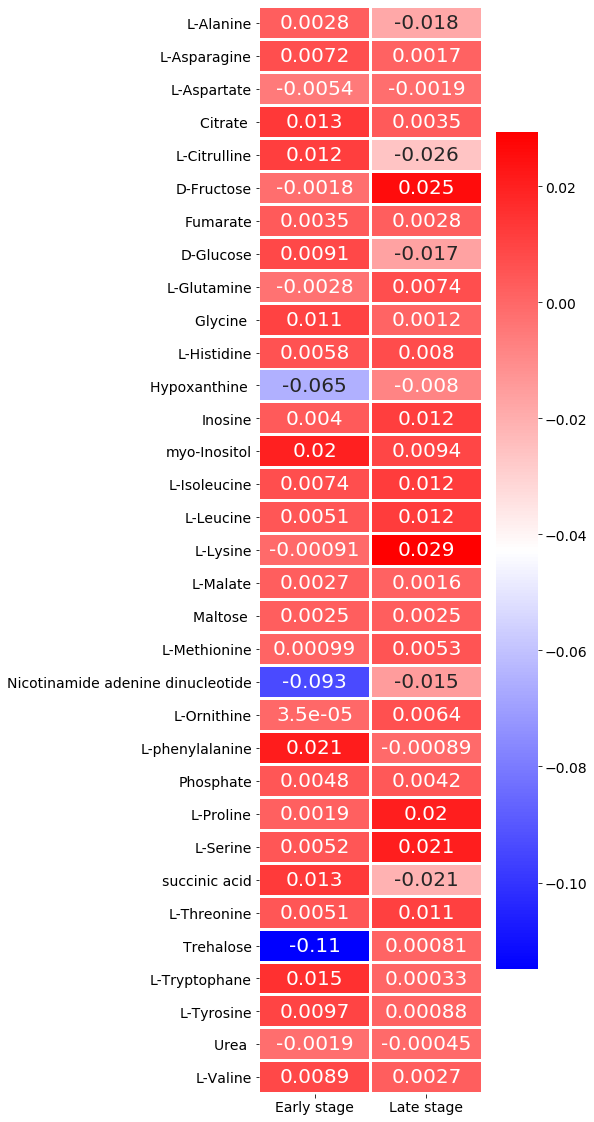

In [254]:
# fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(111)
# ax.imshow(hp)
# ax.set_xticklabels(xlabel)
# ax.set_xticklabels(ylabel)
df['Maltose '] = 0
# df = df/np.abs(df.iloc[0, :])
fig = plt.figure(figsize=(5,20))
# df[df>0] = 1
# df[df<0] = -1
global_mean = np.mean(np.mean(df))
sns.heatmap((df-global_mean).T, linewidth=2, cmap='bwr', annot=True)

# check if the fluxes match the slopes!
# Increase kappa
# use lower number for normalization like 100 or 10...
display(df)

# Z-score between early and late stage of embryogenesis

In [64]:
from scipy import stats
def diff(a, b):
    # a and b should be matrix.
    out = np.zeros((a.shape[0]-1, a.shape[1]))
    # Normalization
    for i in range(a.shape[1]):
        a[:-1, i] = a[:-1, i]/a[-1, i]
    for i in range(b.shape[1]):
        b[:-1, i] = b[:-1, i]/b[-1, i]
    res = np.subtract(b[:-1, :], a[:-1, :])
#     print(np.nonzero(res), a==b)
    for i in range(a.shape[1]):
        out[:, i] = stats.zscore(res[:, i])
    return out

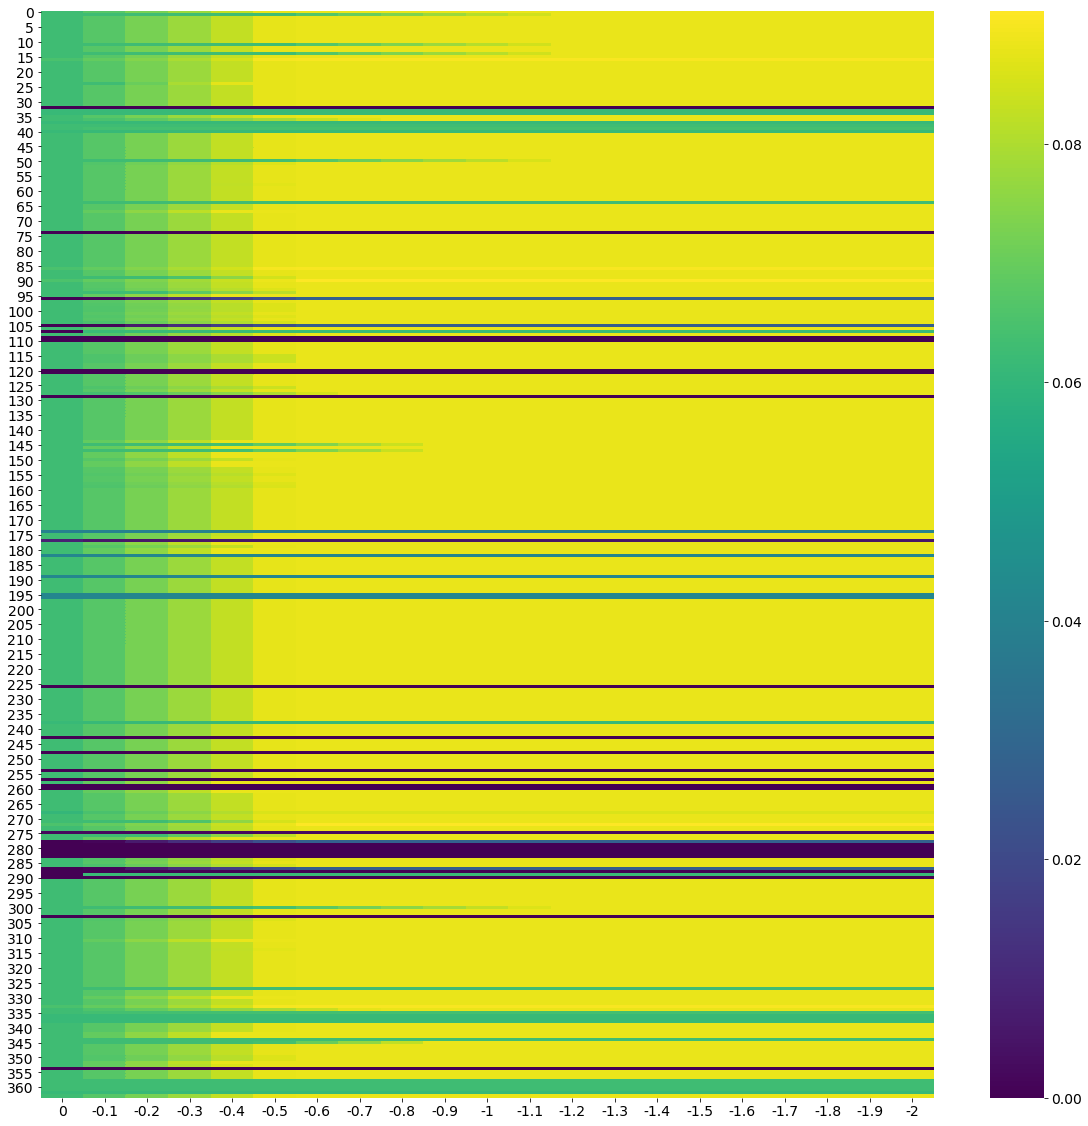

In [81]:
e_DFA = pd.read_csv('[hypoxia]PLOS_FlyEarlyDFA.csv')
l_DFA = pd.read_csv('[hypoxia]PLOS_FlyLateDFA.csv')
# display(str(e_DFA.iloc[-1, :]).split(';'))
# display(str(l_DFA.iloc[-1, :]).split(';'))

rxns = []
res_e = []
with open('[hypoxia]FlyEarlyDFA.csv', 'r') as f:
    for i, r in enumerate(f):
        if i==0:
            pass
            #print('skip', i)
        elif i==1:
            o2_v = [float(v) for v in r.split(';')[1:]]
        else:
            rxns.append(r.split(';')[0].split('"')[1])
            arr = np.array([float(num) for num in r.split(';')[1:]])
            if i==2:
                res_e = arr.copy().reshape(1, len(arr))
            else:
                res_e = np.concatenate((res_e,arr.reshape(1, len(arr))),axis=0)
                
res_l = []
with open('[hypoxia]FlyLateDFA.csv', 'r') as f:
    for i, r in enumerate(f):
        if i==0 or i==1:
            pass
#             print('skip', i)
        else:
            arr = np.array([float(num) for num in r.split(';')[1:]])
            if i==2:
                res_l = arr.copy().reshape(1, len(arr))
            else:
                res_l = np.concatenate((res_l,arr.reshape(1, len(arr))),axis=0)
                
fig = plt.figure(figsize=(20,20))
global_mean = np.mean(np.mean(df))
tmp_df = pd.DataFrame(data=res_l)
tmp_df.columns = o2
# tmp_df.index = mets[1:]
sns.heatmap(tmp_df, linewidth=0, cmap='viridis')

data = diff(res_e, res_l)
df = pd.DataFrame(data)
df.columns = o2_v[:]
df.index = rxns[:-1]
grab = [0, -0.2, -0.4, -0.6, -0.8, -1.0]
# for ele in res_e[:-1, :]:

In [79]:
tmp_df

,0,-0.1,-0.2,-0.3,-0.4,-0.5,-0.6,-0.7,-0.8,-0.9,...,-1.1,-1.2,-1.3,-1.4,-1.5,-1.6,-1.7,-1.8,-1.9,-2
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000000,0.934785,0.867623,0.809465,0.758614,0.713774,0.752615,0.792985,0.834607,0.876228,...,0.959472,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,1.000000,0.934785,0.867623,0.809465,0.758614,0.713774,0.711017,0.711017,0.711017,0.711017,...,0.711017,0.711017,0.711017,0.711017,0.711017,0.711017,0.711017,0.711017,0.711017,0.711017
360,1.000000,0.934785,0.867623,0.809465,0.758614,0.713774,0.711017,0.711017,0.711017,0.711017,...,0.711017,0.711017,0.711017,0.711017,0.711017,0.711017,0.711017,0.711017,0.711017,0.711017
361,1.000000,0.934785,0.867623,0.809465,0.758614,0.713774,0.711017,0.711017,0.711017,0.711017,...,0.711017,0.711017,0.711017,0.711017,0.711017,0.711017,0.711017,0.711017,0.711017,0.711017
362,0.981806,0.917777,0.851837,0.794737,0.744811,0.700787,0.698080,0.698080,0.698080,0.698080,...,0.698080,0.698080,0.698080,0.698080,0.698080,0.698080,0.698080,0.698080,0.698080,0.698080


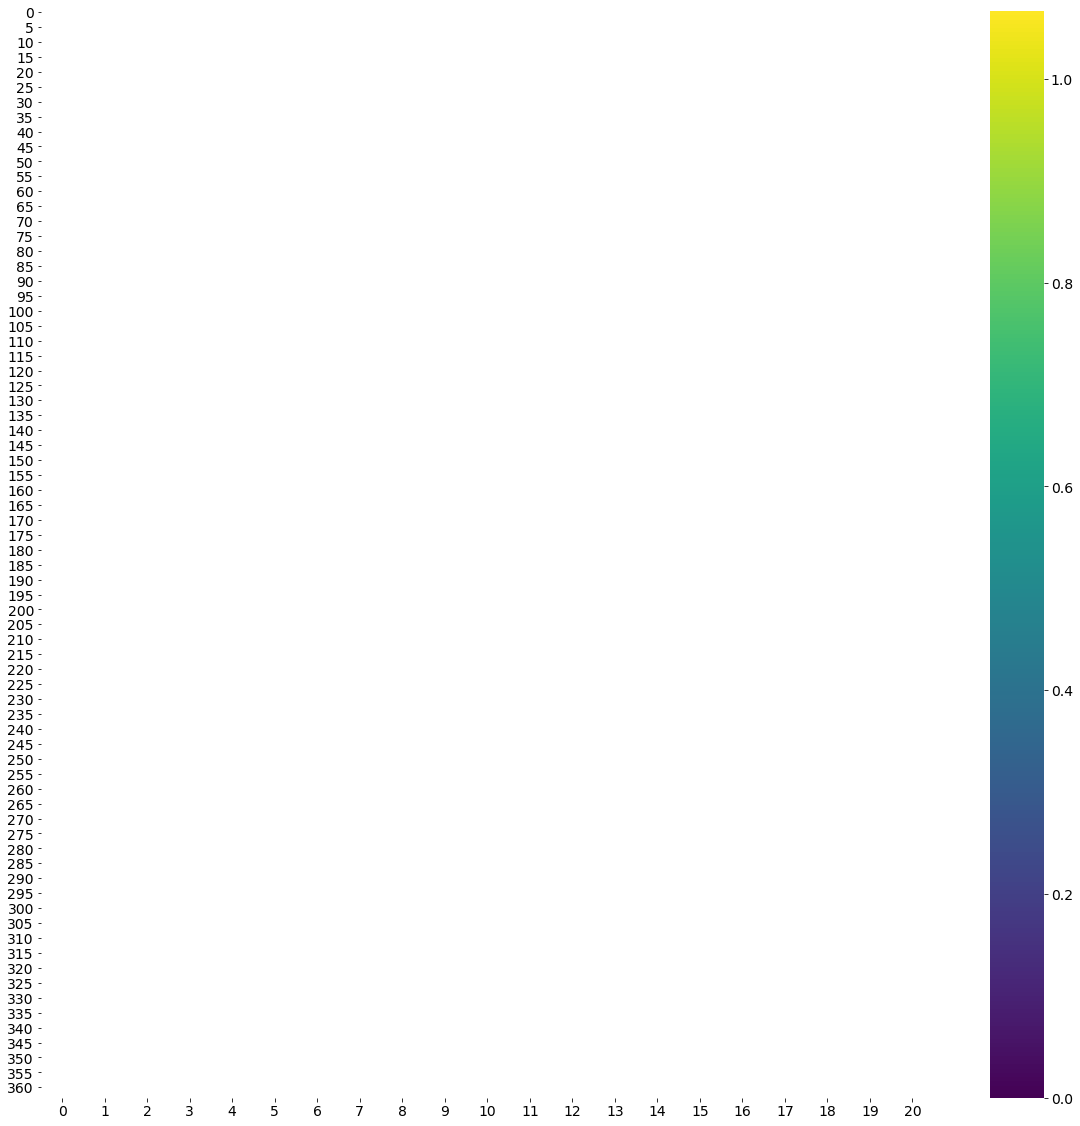

In [8]:
def zscore_plot(df):
    f, ax = plt.subplots(figsize=(10, 6))
    col_name = df.columns
    colors_top = plt.cm.summer(np.linspace(0.95,0.45,len(col_name)))
    colors_last = plt.cm.hsv(np.linspace(0.95,0.45,len(col_name)))
    for i, col in enumerate(col_name):
        if col in grab:
            D = df[col]
            y = np.random.rand(len(D))*0.1
            for j in range(len(D)):
                if 'EX_' not in df.index[j] and 'tm' not in df.index[j]:
                    ax.scatter(D.iloc[j], y[j]+col,
                                    color=colors_last[i],
                                    s=25)
#     ax.set_xlim([-3, 3])
    ax.set_title('Z-score distribution'.format(i))
    ax.set_xlabel('Z-score')
    ax.set_ylabel('Oxygen uptake rate')
    CanvasStyle(ax, square=False)
    plt.show()

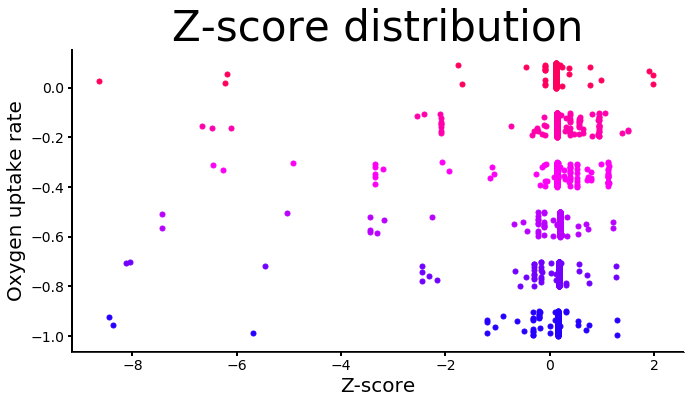

In [9]:
zscore_plot(df)

In [10]:
def zscore_plot(df):
    df_tmp = df[-1.0]
    # Initialize a figure.
    fig, axes = plt.subplots(nrows=2, 
                             ncols=1,
                             sharex=True,
                             sharey=False, 
                             gridspec_kw={'height_ratios': [5, 1]},
                             figsize=(10, 6))
    
    fig.tight_layout()
    D = df_tmp
    colors = plt.cm.rainbow(np.linspace(0,1,len(D)))
    axes[0].hist(D, color='k')
    y = np.random.rand(len(D))*0.1
    for j in range(len(D)):
        axes[1].scatter(D.iloc[j], y[j],
                        color='k',
                        s=25)
        if 'EX_' not in df.index[j] and 'tm' not in df.index[j]:
            if D.iloc[j]>2 or D.iloc[j]<-2:
                axes[1].scatter(D.iloc[j], y[j],
                            color=colors[int(len(D)*np.random.random())],
                            s=30, label=df.index[j])
            
    axes[0].set_title('Z-score distribution'.format(i))
#     axes[1].set_xlabel('Z-score')
#     axes[1].set_ylabel('Oxygen uptake rate')
    axes[1].set_ylim([0, 0.1])
    CanvasStyle(axes[0], square=True)
    CanvasStyle(axes[1], square=True)
    plt.legend(bbox_to_anchor=(1.3,7))
    plt.show()

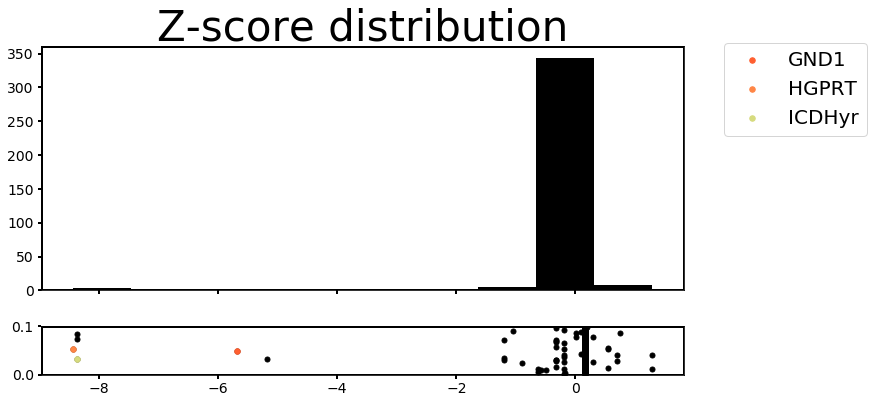

In [11]:
zscore_plot(df)

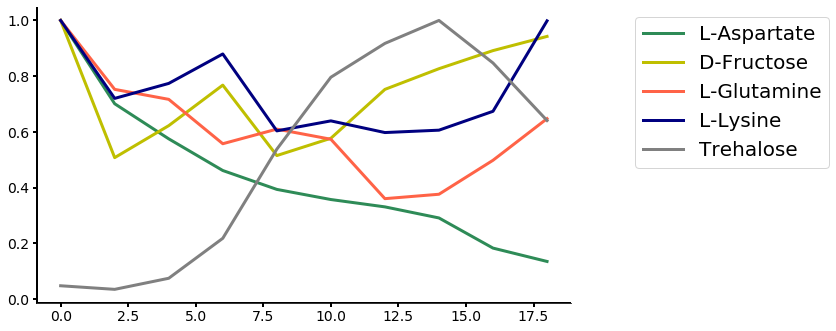

In [256]:
raw = pd.read_excel('FlyData.xlsx', sheet_name='PLOS_BestMatch')
data = raw.iloc[0:, 4:]
mets = raw.iloc[:, 0]

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)

colors_top = plt.cm.viridis(np.linspace(0,1,10))
diff_abs = np.zeros(len(mets))
for i, ele in enumerate(mets):
    diff_abs[i] = abs(np.diff(data.iloc[i, :])).sum()
inds = np.argsort(diff_abs)[::-1][:10]
ct = 0
# for i, ele in enumerate(mets):
#     if i in inds:
#         ax.plot(data.iloc[i, :], label=ele, color=colors_top[ct], linewidth=3)
#         ct += 1
#     else:
#         pass
    
    
for i, ele in enumerate(mets):
    if ele == 'L-Glutamine':
        ax.plot(data.iloc[i, :]/max(abs(data.iloc[i, :])), label=ele, color='tomato', linewidth=3)
    if ele == 'L-Lysine':
        ax.plot(data.iloc[i, :]/max(abs(data.iloc[i, :])), label=ele, color='navy', linewidth=3)
    if ele == 'L-Aspartate':
        ax.plot(data.iloc[i, :]/max(abs(data.iloc[i, :])), label=ele, color='seagreen', linewidth=3)
    if ele == 'Trehalose':
        ax.plot(data.iloc[i, :]/max(abs(data.iloc[i, :])), label=ele, color='grey', linewidth=3)
    if ele == 'D-Fructose':
        ax.plot(data.iloc[i, :]/max(abs(data.iloc[i, :])), label=ele, color='y', linewidth=3)
# ax.plot(data.iloc[8, :], label=ele, color='y', linewidth=3)
# ax.plot(data.iloc[i, :]/max(data.iloc[i, :]), color='white')
plt.legend(bbox_to_anchor=(1.1,1))
plt.tight_layout()
CanvasStyle(ax, square=False)

In [15]:
arr = np.array([1,3,2,4,5])
abs(np.diff(arr)).sum

<function ndarray.sum>

NameError: name 'fly' is not defined